<a href="https://www.kaggle.com/code/suryanshmehrotra/pokemon-descriptive-analysis?scriptVersionId=122123054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation-2
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('max_columns',23) #see all(23) columns in output

In [2]:
df = pd.read_csv("/kaggle/input/pokemon/pokemon_alopez247.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
df.tail()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


In [4]:
#dimension of DataFrame
df.shape

(721, 23)

In [5]:
df.index

RangeIndex(start=0, stop=721, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [7]:
#Basic Statistical Details continuous Variables
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [8]:
#statstics including object
df.describe(include = ['object'])

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
count,721,721,350,721,721,191,721
unique,721,18,18,10,15,13,14
top,Bulbasaur,Water,Flying,Blue,Field,Dragon,bipedal_tailed
freq,1,105,87,134,169,35,158


In [9]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [10]:
#Number of Null Values 
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [11]:
#Deleting column with a lot of missing values
df = df.drop(['Type_2','Egg_Group_2'],axis=1)

In [12]:
#Renaming columns
df = df.rename(columns={'Type_1': 'Type',
                   'Egg_Group_1': 'Egg_Group'})

In [13]:
#DataFrame after Deleting and Renaming Columns
df.head()

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [14]:
#checking if any rows is duplicated
df.duplicated().sum()

0

In [15]:
#Body Measurements of Pokemon
measurements = df[['Name','Height_m','Weight_kg']]
measurements

,Name,Height_m,Weight_kg
0,Bulbasaur,0.71,6.9
1,Ivysaur,0.99,13.0
2,Venusaur,2.01,100.0
3,Charmander,0.61,8.5
4,Charmeleon,1.09,19.0
...,...,...,...
716,Yveltal,5.79,203.0
717,Zygarde,5.00,305.0
718,Diancie,0.71,8.8
719,Hoopa,0.51,9.0


In [16]:
#Red Coloured Pokemons
red_pokemons = df[df['Color'] == 'Red']
red_pokemons

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,534,78,84,78,109,85,100,1,False,Red,True,0.875,Monster,True,1.70,90.5,45,bipedal_tailed
44,45,Vileplume,Grass,490,75,80,85,110,90,50,1,False,Red,True,0.500,Grass,False,1.19,18.6,45,bipedal_tailless
45,46,Paras,Bug,285,35,70,55,45,55,25,1,False,Red,True,0.500,Bug,False,0.30,5.4,190,insectoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,661,Fletchling,Normal,278,45,50,43,40,38,62,6,False,Red,True,0.500,Flying,False,0.30,1.7,255,two_wings
661,662,Fletchinder,Fire,382,62,73,55,56,52,84,6,False,Red,True,0.500,Flying,False,0.71,16.0,120,two_wings
662,663,Talonflame,Fire,499,78,81,71,74,69,126,6,False,Red,True,0.500,Flying,False,1.19,24.5,45,two_wings
696,697,Tyrantrum,Rock,521,82,121,119,69,59,71,6,False,Red,True,0.875,Monster,False,2.49,270.0,45,bipedal_tailed


In [17]:
#Average Catch Rate
Avg_Catch_Rate = df['Catch_Rate'].mean()
print("Average Catch Rate of Pokemons is" , Avg_Catch_Rate)

Average Catch Rate of Pokemons is 100.24687933425797


In [18]:
#Pokemons with Name Starting  From 'N'
S_named = df.loc[(df['Name'].str.startswith('N'))]
S_named

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
28,29,Nidoran♀,Poison,275,55,47,52,40,40,41,1,False,Blue,True,0.00,Monster,False,0.41,7.0,235,quadruped
29,30,Nidorina,Poison,365,70,62,67,55,55,56,1,False,Blue,True,0.00,Undiscovered,False,0.79,20.0,120,quadruped
30,31,Nidoqueen,Poison,505,90,92,87,75,85,76,1,False,Blue,True,0.00,Undiscovered,False,1.30,60.0,45,bipedal_tailed
31,32,Nidoran♂,Poison,273,46,57,40,40,40,50,1,False,Purple,True,1.00,Monster,False,0.51,9.0,235,quadruped
32,33,Nidorino,Poison,365,61,72,57,55,55,65,1,False,Purple,True,1.00,Monster,False,0.89,19.5,120,quadruped
33,34,Nidoking,Poison,505,81,102,77,85,75,85,1,False,Purple,True,1.00,Monster,False,1.40,62.0,45,bipedal_tailed
37,38,Ninetales,Fire,505,73,76,75,81,100,100,1,False,Yellow,True,0.25,Field,False,1.09,19.9,75,quadruped
163,164,Noctowl,Normal,442,100,50,50,76,96,70,2,False,Brown,True,0.50,Flying,False,1.60,40.8,90,two_wings
176,177,Natu,Psychic,320,40,50,45,70,45,70,2,False,Green,True,0.50,Flying,False,0.20,2.0,190,two_wings
273,274,Nuzleaf,Grass,340,70,70,40,60,40,60,3,False,Brown,True,0.50,Field,False,0.99,28.0,120,bipedal_tailless


In [19]:
#Number of pokemons that has Mega Evolution
print(df['hasMegaEvolution'].values.sum())

46


 **Filtering Pandas Dataframe with multiple conditions**

*METHOD-1*

In [20]:
#Fire and Rock type Pokemons
fire_type1 = df.loc[(df['Type'] == 'Fire') & (df['Color'] == 'Yellow')]
fire_type1

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
37,38,Ninetales,Fire,505,73,76,75,81,100,100,1,False,Yellow,True,0.250,Field,False,1.09,19.9,75,quadruped
76,77,Ponyta,Fire,410,50,85,55,65,65,90,1,False,Yellow,True,0.500,Field,False,0.99,30.0,190,quadruped
77,78,Rapidash,Fire,500,65,100,70,80,80,105,1,False,Yellow,True,0.500,Field,False,1.70,95.0,60,quadruped
145,146,Moltres,Fire,580,90,100,90,125,85,90,1,True,Yellow,False,NaN,Undiscovered,False,2.01,60.0,3,two_wings
154,155,Cyndaquil,Fire,309,39,52,43,60,50,65,2,False,Yellow,True,0.875,Field,False,0.51,7.9,45,bipedal_tailless
155,156,Quilava,Fire,405,58,64,58,80,65,80,2,False,Yellow,True,0.875,Field,False,0.89,19.0,45,quadruped
156,157,Typhlosion,Fire,534,78,84,78,109,85,100,2,False,Yellow,True,0.875,Field,False,1.70,79.5,45,quadruped
321,322,Numel,Fire,305,60,60,40,65,45,35,3,False,Yellow,True,0.500,Field,False,0.71,24.0,255,quadruped


*OR METHOD-2*

In [21]:
fire_type2 = df.query('Type == "Fire"and Color == "Yellow"')
fire_type2

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
37,38,Ninetales,Fire,505,73,76,75,81,100,100,1,False,Yellow,True,0.250,Field,False,1.09,19.9,75,quadruped
76,77,Ponyta,Fire,410,50,85,55,65,65,90,1,False,Yellow,True,0.500,Field,False,0.99,30.0,190,quadruped
77,78,Rapidash,Fire,500,65,100,70,80,80,105,1,False,Yellow,True,0.500,Field,False,1.70,95.0,60,quadruped
145,146,Moltres,Fire,580,90,100,90,125,85,90,1,True,Yellow,False,NaN,Undiscovered,False,2.01,60.0,3,two_wings
154,155,Cyndaquil,Fire,309,39,52,43,60,50,65,2,False,Yellow,True,0.875,Field,False,0.51,7.9,45,bipedal_tailless
155,156,Quilava,Fire,405,58,64,58,80,65,80,2,False,Yellow,True,0.875,Field,False,0.89,19.0,45,quadruped
156,157,Typhlosion,Fire,534,78,84,78,109,85,100,2,False,Yellow,True,0.875,Field,False,1.70,79.5,45,quadruped
321,322,Numel,Fire,305,60,60,40,65,45,35,3,False,Yellow,True,0.500,Field,False,0.71,24.0,255,quadruped


In [22]:
#pokemon with max attack
attribute = 'Attack'
df[(df[attribute]) == (df[attribute].max())]

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
408,409,Rampardos,Rock,495,97,165,60,65,50,58,4,False,Blue,True,0.875,Monster,False,1.6,102.5,45,bipedal_tailed


In [23]:
#Total Number of Bug Type Pokemons
_Type = "Bug"
print("Total Number of" , _Type , "type Pokemons is" , df['Type'].value_counts()[_Type])

Total Number of Bug type Pokemons is 63


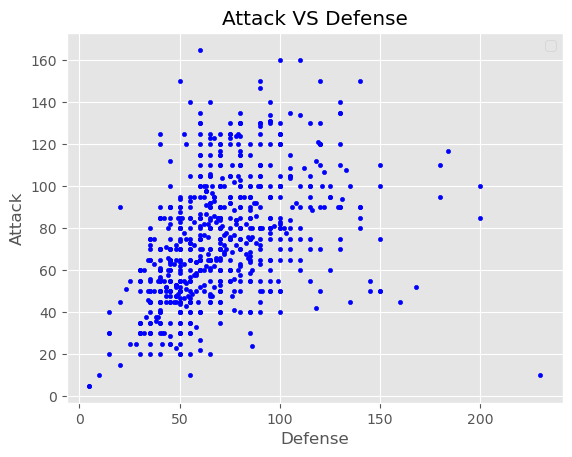

In [24]:
x = df['Defense']
y = df['Attack']

#plt.plot(x,y)
plt.scatter(x, y, color= "b", marker= ".", s=35)
  
# x-axis label
plt.xlabel('Defense')
# frequency label
plt.ylabel('Attack')
# plot title
plt.title('Attack VS Defense')
# showing legend
plt.legend()
plt.show()

Text(0, 0.5, 'Counts')

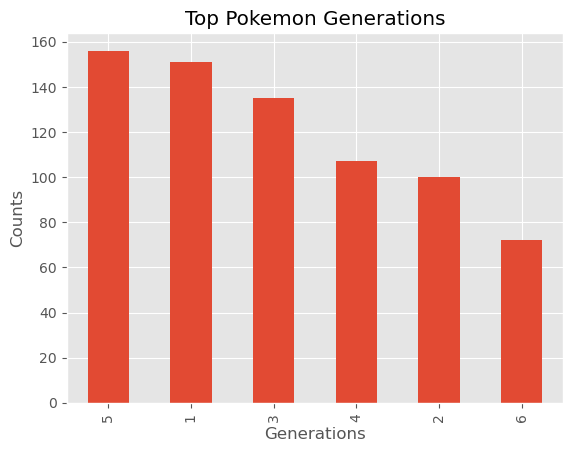

In [25]:
#Top Pokemon Generations (Bar Chart)
fig2 = df['Generation'].value_counts() \
.plot(kind='bar', title='Top Pokemon Generations')
fig2.set_xlabel('Generations')
fig2.set_ylabel('Counts')

In [26]:
#Pokemon Type Count (Bar Chart)
Type_Count = df['Type'].value_counts()
plot = px.bar(x= Type_Count.index, y= Type_Count.values, text = Type_Count.values, title='Pokemon Type Count')
plot.show()

**Analysing Colors of Pokemon**

In [27]:
#number of distinct elements in 'Color' column
df['Color'].nunique()

10

In [28]:
#changing column 'Color' to Set to  Duplicates
color_set = set(df['Color'])
color_set

{'Black',
 'Blue',
 'Brown',
 'Green',
 'Grey',
 'Pink',
 'Purple',
 'Red',
 'White',
 'Yellow'}

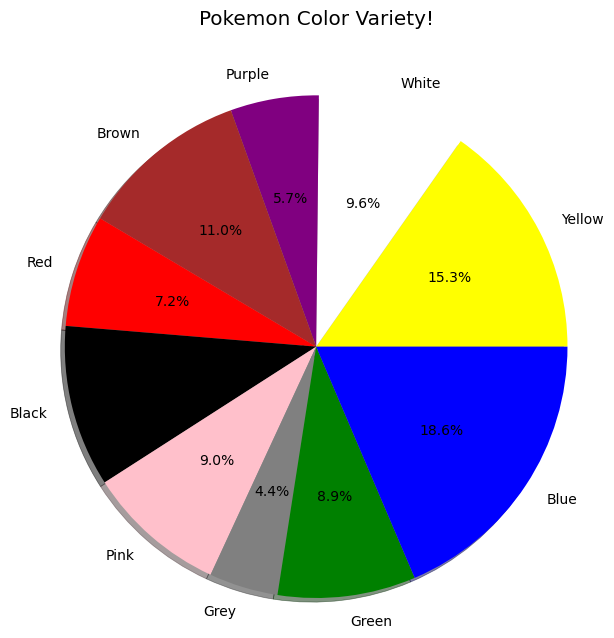

In [29]:
# portion covered by each label
slices = [df['Color'].value_counts()['Brown'],
          df['Color'].value_counts()['Grey'],
          df['Color'].value_counts()['Pink'],
          df['Color'].value_counts()['Green'],
          df['Color'].value_counts()['White'],
          df['Color'].value_counts()['Red'],
          df['Color'].value_counts()['Purple'],
          df['Color'].value_counts()['Black'],
          df['Color'].value_counts()['Yellow'],
          df['Color'].value_counts()['Blue']]

#plotting pie chart
plt.pie(slices, colors = color_set, labels = color_set, radius = 1.7, shadow = True, autopct='%1.1f%%')
plt.title("Pokemon Color Variety!",  x=0.5, y=1.35)
plt.show()

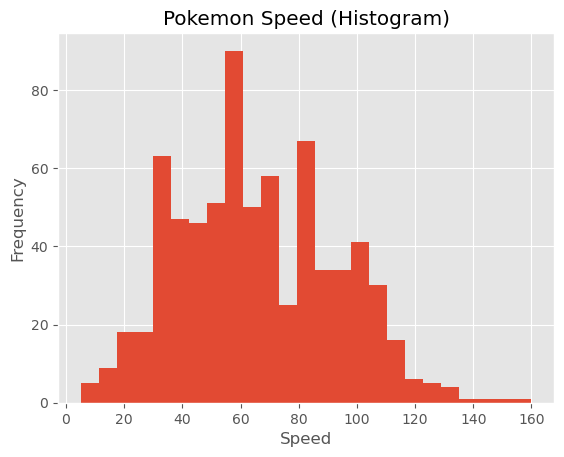

In [30]:
#Pokemon Speed (Histogram)
fig3 = df['Speed'].plot(kind='hist', bins = 25, title='Pokemon Speed (Histogram)')
fig3.set_xlabel('Speed')
plt.show()

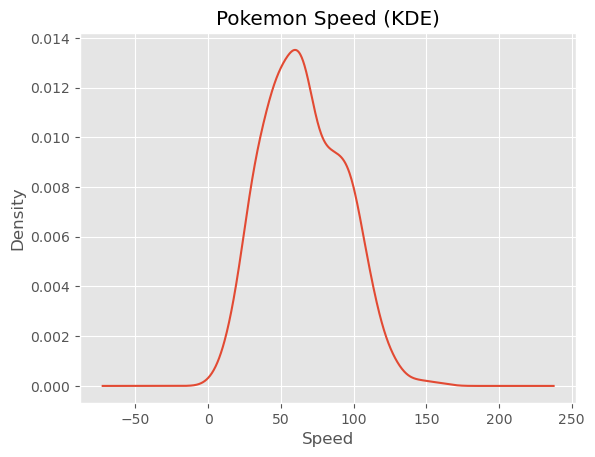

In [31]:
#Pokemon Speed (KDE)
fig4 = df['Speed'].plot(kind='kde',title='Pokemon Speed (KDE)')
fig4.set_xlabel('Speed')
plt.show()

In [32]:
df

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,680,126,131,95,131,98,99,6,True,Red,False,NaN,Undiscovered,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,600,108,100,121,81,95,95,6,True,Green,False,NaN,Undiscovered,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,600,50,100,150,100,150,50,6,True,Pink,False,NaN,Undiscovered,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,600,80,110,60,150,130,70,6,True,Purple,False,NaN,Undiscovered,False,0.51,9.0,3,head_only


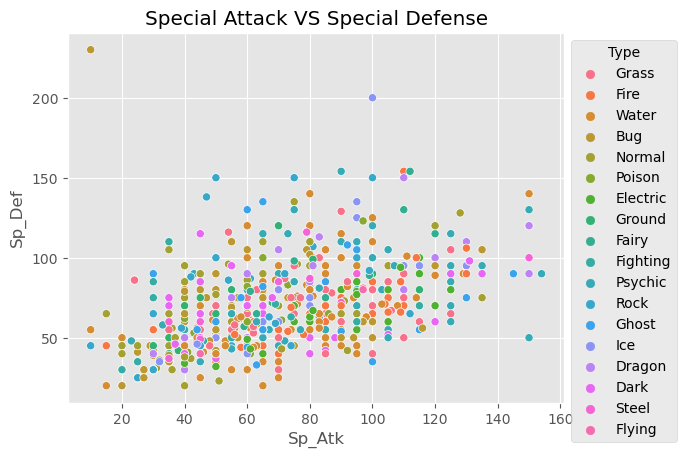

In [33]:
fig4 = sns.scatterplot(x='Sp_Atk', y = 'Sp_Def', data=df, hue='Type', s = 35)
fig4.set_title('Special Attack VS Special Defense')
sns.move_legend(fig4, "upper left", bbox_to_anchor=(1, 1))
plt.show()

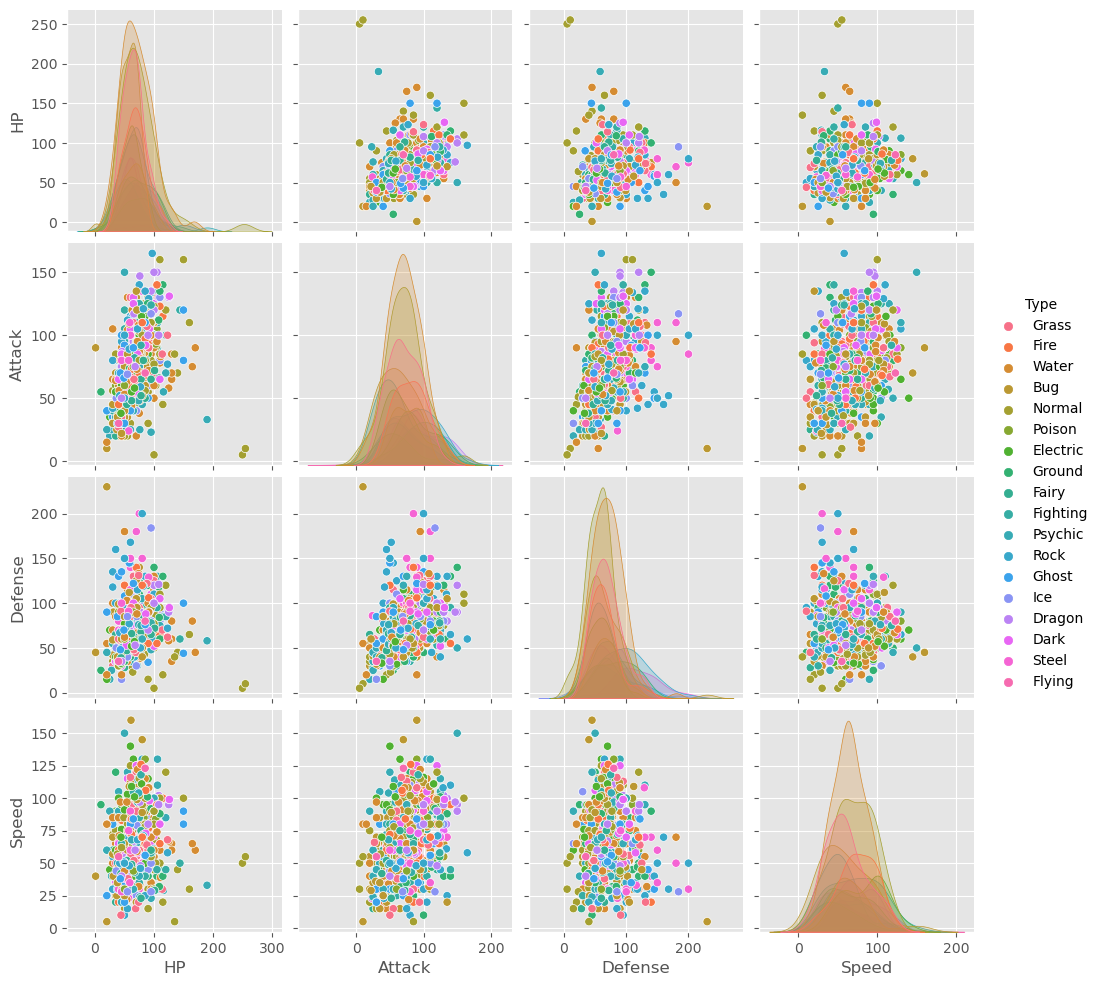

In [34]:
#Pair Plot
fig5 = sns.pairplot(df, vars=['HP', 'Attack', 'Defense', 'Speed'], hue='Type')
plt.show()

In [35]:
#Correlation between Columns
Corr=df[['HP', 'Attack', 'Defense' ,'Sp_Atk' ,'Sp_Def' ,'Speed','Sp_Atk', 'Height_m', 'Weight_kg']].dropna().corr()
Corr

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Sp_Atk,Height_m,Weight_kg
HP,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.368640,0.442872,0.431320
Attack,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.335205,0.408590,0.469395
Defense,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.202519,0.354205,0.476983
Sp_Atk,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,1.000000,0.330579,0.285048
Sp_Def,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.492861,0.313196,0.328645
Speed,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.443106,0.224617,0.108637
Sp_Atk,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,1.000000,0.330579,0.285048
Height_m,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,0.330579,1.000000,0.661342
Weight_kg,0.431320,0.469395,0.476983,0.285048,0.328645,0.108637,0.285048,0.661342,1.000000


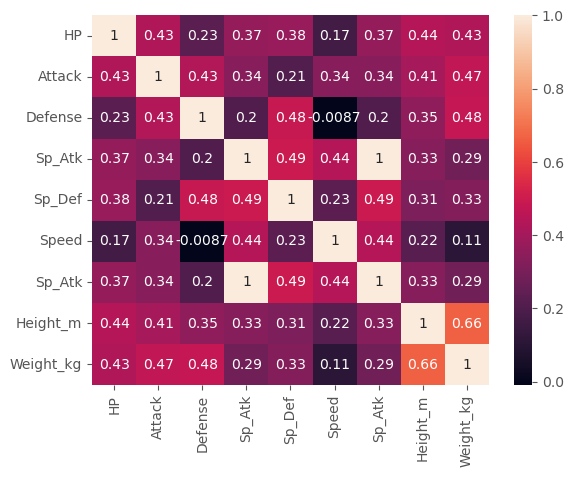

In [36]:
#Heatmap of Correlations
sns.heatmap(data= Corr, annot=True)
plt.show()